# Setup

In [56]:
import pdb
import pickle
import sys

In [79]:
%reload_ext autoreload
%autoreload 2

src_path = "/Users/aarontrefler_temp2/Documents/My Documents/Kaggle/ncaa-men-19/src"
sys.path.insert(0, src_path)

import models.model_utils as model
import utils

pd.options.display.max_columns = 999

In [123]:
# Read in fitted model
f = open(utils.project_path + 'models/gridcv.model', 'rb')
gridcv = pickle.load(f)
f.close()

In [124]:
# Read in clean modeling dataset
data_clean_dir = utils.project_path + 'data/clean/'
df_clean_mdl = (pd.read_csv(data_clean_dir + 'model_dataset.csv'))

# Cross Validation Results

In [125]:
# Best hyper-parameters
display(gridcv.best_params_)

{'max_depth': None,
 'min_samples_split': 87,
 'n_estimators': 1000,
 'random_state': 3}

In [126]:
display(pd.DataFrame(gridcv.cv_results_).sort_values('rank_test_neg_log_loss'))

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_neg_log_loss,mean_train_accuracy,mean_train_neg_log_loss,param_max_depth,param_min_samples_split,param_n_estimators,param_random_state,params,rank_test_accuracy,rank_test_neg_log_loss,split0_test_accuracy,split0_test_neg_log_loss,split0_train_accuracy,split0_train_neg_log_loss,std_fit_time,std_score_time,std_test_accuracy,std_test_neg_log_loss,std_train_accuracy,std_train_neg_log_loss
2,1.809114,0.166180,0.711111,-0.579199,0.788725,-0.476164,None,87,1000,3,"{'random_state': 3, 'n_estimators': 1000, 'max...",2,1,0.711111,-0.579199,0.788725,-0.476164,0.0,0.0,0.0,0.0,0.0,0.0
3,1.708724,0.159516,0.711111,-0.579409,0.787630,-0.481630,None,100,1000,3,"{'random_state': 3, 'n_estimators': 1000, 'max...",2,2,0.711111,-0.579409,0.787630,-0.481630,0.0,0.0,0.0,0.0,0.0,0.0
1,1.822802,0.175028,0.717460,-0.579607,0.795840,-0.470883,None,75,1000,3,"{'random_state': 3, 'n_estimators': 1000, 'max...",1,3,0.717460,-0.579607,0.795840,-0.470883,0.0,0.0,0.0,0.0,0.0,0.0
0,1.886288,0.167808,0.711111,-0.581327,0.808976,-0.456110,None,50,1000,3,"{'random_state': 3, 'n_estimators': 1000, 'max...",2,4,0.711111,-0.581327,0.808976,-0.456110,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Importances

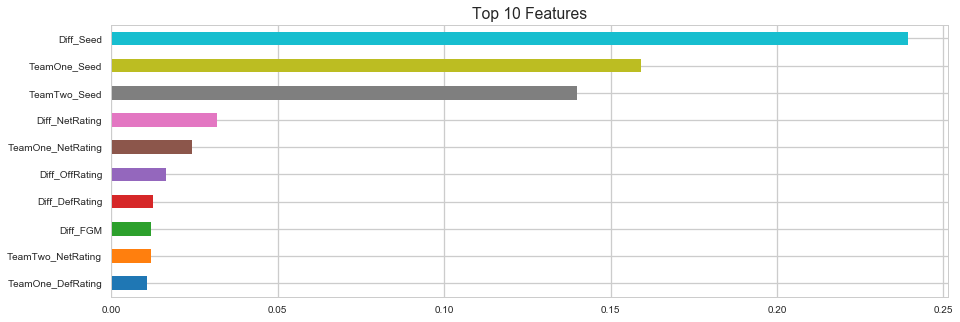

In [131]:
(
    pd.Series(gridcv.best_estimator_.feature_importances_, index=df_clean_mdl[model.get_features(df_clean_mdl)].columns)
    .nlargest(n=10)  # top 10
    .sort_values()
    .plot(kind='barh', figsize=(15, 5), fontsize=10, title='Top 10 Features')
)
plt.show()